In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Report = ProfileReport(df)
#Report.to_widgets()

In [5]:
#Report.to_file('Report.html')

In [6]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of Numerical Feature :',len(numerical_feature))

df[numerical_feature].head()

Number of Numerical Feature : 7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [7]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of Categorical Feature :',len(categorical_feature))

df[categorical_feature].head()

Number of Categorical Feature : 5


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [8]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
label = LabelEncoder()
df['Sex_Type'] = label.fit_transform(df['Sex'])

In [12]:
df['Sex_Type'] = df
df.drop(['Sex'],axis=1,inplace=True)

In [13]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Type
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3-q1

((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

Age          66
Fare        116
Parch       213
Pclass        0
Sex_Type      0
SibSp        46
Survived      0
dtype: int64

In [15]:
col = ['Age','Fare','Parch','SibSp']
for i in col:
    q75,q25 = np.percentile(df[i],[75,25])
    iqr = q75-q25
    minimum = q25-1.5*iqr
    maximum = q75+1.5*iqr
    df.loc[df[i] < minimum, i] = minimum
    df.loc[df[i] > maximum, i] = maximum

In [16]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

Age         0
Fare        0
Parch       0
Pclass      0
Sex_Type    0
SibSp       0
Survived    0
dtype: int64

In [17]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.080846
SibSp       1.621154
Parch       0.000000
Fare        1.082179
Sex_Type    0.478523
dtype: float64

In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Type
0,0,3,22.0,1.0,0.0,7.2500,0
1,1,1,38.0,1.0,0.0,65.6344,1
2,1,3,26.0,0.0,0.0,7.9250,1
3,1,1,35.0,1.0,0.0,53.1000,1
4,0,3,35.0,0.0,0.0,8.0500,0


In [19]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
scaling_feature = [feature for feature in df.columns if feature not in ['Survived']]
df[scaling_feature].head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Type
0,3,22.0,1.0,0.0,7.2500,0
1,1,38.0,1.0,0.0,65.6344,1
2,3,26.0,0.0,0.0,7.9250,1
3,1,35.0,1.0,0.0,53.1000,1
4,3,35.0,0.0,0.0,8.0500,0


In [21]:
scaler = StandardScaler()
scaler.fit(df[scaling_feature])

StandardScaler()

In [22]:
scaler.transform(df[scaling_feature])

array([[ 0.82737724, -0.61191663,  0.81022003,  0.        , -0.82055245,
        -0.78927234],
       [-1.56610693,  0.71530435,  0.81022003,  0.        ,  2.03162322,
         1.2669898 ],
       [ 0.82737724, -0.28011139, -0.60251196,  0.        , -0.78757757,
         1.2669898 ],
       ...,
       [ 0.82737724,  0.02673527,  0.81022003,  0.        , -0.02915533,
        -0.78927234],
       [-1.56610693, -0.28011139, -0.60251196,  0.        ,  0.29082313,
         1.2669898 ],
       [ 0.82737724,  0.21759648, -0.60251196,  0.        , -0.79612661,
        -0.78927234]])

In [23]:
data = pd.concat([df['Survived'].reset_index(drop=True), pd.DataFrame(scaler.transform(df[scaling_feature]),
                                                                      columns=df[scaling_feature].columns)],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Type
0,0,0.827377,-0.611917,0.810220,0.0,-0.820552,-0.789272
1,1,-1.566107,0.715304,0.810220,0.0,2.031623,1.266990
2,1,0.827377,-0.280111,-0.602512,0.0,-0.787578,1.266990
3,1,-1.566107,0.466450,0.810220,0.0,1.419297,1.266990
4,0,0.827377,0.466450,-0.602512,0.0,-0.781471,-0.789272


In [24]:
X = data.drop(['Survived'],axis=1)
y = data['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
print('Traning Score : {}'.format(dtc.score(X_train,y_train)))
print('Testing Score : {}'.format(dtc.score(X_test,y_test)))

Traning Score : 1.0
Testing Score : 1.0


[Text(558.0, 815.4000000000001, 'X[5] <= 0.239\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 444\nvalue = [444, 0]'),
 Text(837.0, 271.79999999999995, 'gini = 0.0\nsamples = 268\nvalue = [0, 268]')]

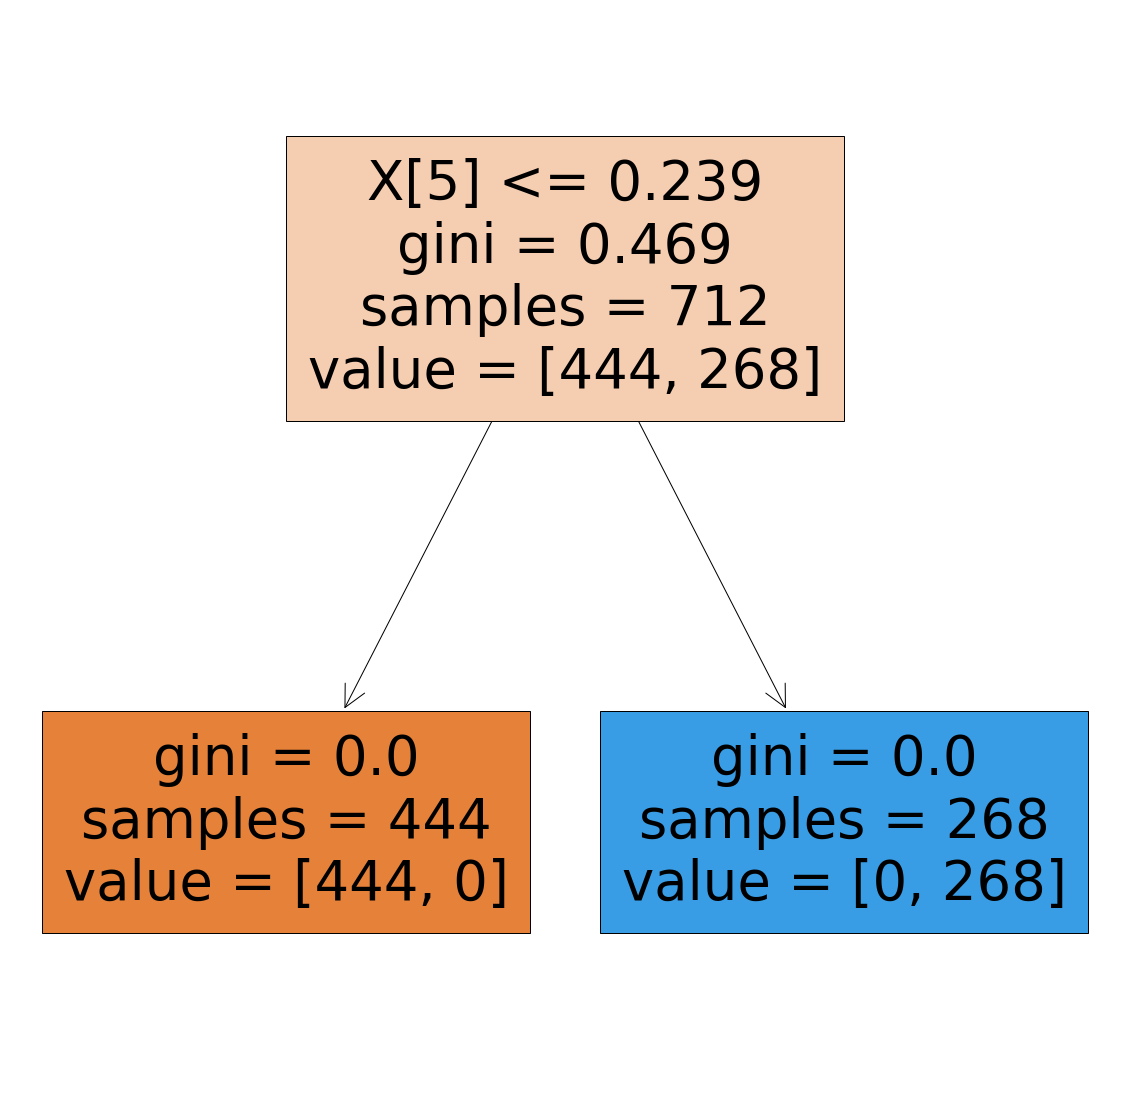

In [28]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,filled=True)

In [29]:
grid_param = {'criterion' :['gini','entropy'],
              'splitter'  :['best','random'],
              'max_depth' :range(1,10,1),
              'min_samples_leaf':range(1,10,1),
              'min_samples_split':range(1,10,1)}

dtc_grid = GridSearchCV(estimator=dtc, param_grid= grid_param, verbose=1, cv=5, n_jobs=-1)
dtc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [30]:
dtc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [31]:
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter='best')
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [32]:
print('Traning Score : {}'.format(dtc2.score(X_train,y_train)))
print('Testing Score : {}'.format(dtc2.score(X_test,y_test)))

Traning Score : 1.0
Testing Score : 1.0


In [33]:
print(confusion_matrix(dtc2.predict(X_test),y_test))
print(classification_report(dtc2.predict(X_test),y_test))

[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [34]:
import pickle

file1 = 'Scaler.pkl'
file2 = 'Titanic.pkl'

pickle.dump(scaler,open(file1,'wb'))
pickle.dump(dtc2,open(file2,'wb'))